# Importing Classical Libraries

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pylatexenc

# Importing Quantum Computing Libraries

In [2]:
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms import VQC, QSVC
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel


In [3]:
import pandas as pd

## Loading Dataset using pandas library

In [4]:
df=pd.read_csv('taiwan_data.csv')

## Label Encoding
### What is Label Encoding?
Label encoding converts categorical values into numerical values, allowing machine learning models to process them.
<br>

In [5]:
# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in df.select_dtypes(include=['object']).columns:
  df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


# Splitting dataset into test and train groups

In [6]:
X=df.drop('Bankrupt?',axis=1)
y=df['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Classical Machine Learning Models Implementation

In [7]:
models = [

    SVC(),
    RandomForestClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Model: {model.__class__.__name__}, Score: {score}")

Model: SVC, Score: 0.9653958944281525
Model: RandomForestClassifier, Score: 0.9683284457478006


# Plotting The Confusion Matrix

In [8]:
import matplotlib.pyplot as plt


models = [
    
    SVC(),
    RandomForestClassifier(),
]

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  print(f"Model: {model.__class__.__name__}")
  print(f"  Accuracy: {accuracy:.4f}")
  
  print("-" * 20)



c:\Users\SURFACE\Downloads\Classical Implementation (PCA _ SVM)\2. African Economic Crises prediction\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model: SVC
  Accuracy: 0.9654
--------------------
Model: RandomForestClassifier
  Accuracy: 0.9683
--------------------


# Data Preparation For Quantum Machine Learning 

In [9]:
#Creating copy for quantum Processing
np.random.seed(42)
dfq = df.sample(n=500).copy()

In [10]:
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in dfq.select_dtypes(include=['object']).columns:
  dfq[col] = le.fit_transform(dfq[col])

# Display the updated DataFrame
dfq.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
239,0,0.434456,0.481247,0.498742,0.596326,0.596326,0.998791,0.797012,0.809041,0.303237,...,0,0.765336,0.001373,0.626305,0.596326,0.838369,0.275936,0.026791,0.565157,0.087378
2850,0,0.542534,0.571413,0.590663,0.603417,0.603417,0.999041,0.797476,0.809375,0.303526,...,0,0.817797,0.001010,0.625384,0.603415,0.841846,0.279975,0.026904,0.565645,0.028519
2687,0,0.584897,0.631433,0.617057,0.610567,0.609954,0.999079,0.797542,0.809422,0.303560,...,0,0.847518,0.001218,0.623886,0.610563,0.843304,0.277186,0.026792,0.565161,0.048876
6500,1,0.436942,0.490951,0.482413,0.607987,0.607951,0.998921,0.797265,0.809187,0.303408,...,0,0.767650,0.000978,0.623608,0.607985,0.834479,0.296390,0.026615,0.564153,0.014691
2684,0,0.506898,0.565526,0.561754,0.608693,0.608693,0.999103,0.797538,0.809447,0.303503,...,0,0.810394,0.003965,0.620144,0.608693,0.841780,0.285421,0.027121,0.566357,0.019245


In [11]:
# Calculate the correlation matrix
correlation_matrix = dfq.corr()


# Feature Engineering to reduce Number of Features

I check the correlation heatmap to determine which features affect the Bankrupt? the most. I found that many features have a correlation of less than 0.2. I dropped those features and created new features by combining highly correlated features with the Bankrupt?.

In [12]:
# Calculate correlation matrix
correlation_matrix = dfq.corr()

# Get correlations with target variable 'Bankrupt?'
target_correlations = correlation_matrix['Bankrupt?'].abs()

# Filter columns with correlation < 0.5
columns_to_drop = target_correlations[target_correlations < 0.32].index
columns_to_drop = columns_to_drop[columns_to_drop != 'Bankrupt?']  # exclude target variable

# Drop columns
dfq_filtered = dfq.drop(columns=columns_to_drop)

print(f"Dropped columns: {list(columns_to_drop)}")
print(f"Remaining columns: {dfq_filtered.columns}")

print(f"Number of remaining columns: {len(dfq_filtered.columns)}")

Dropped columns: [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Gro

In [13]:
dfq_filtered

,Bankrupt?,Total debt/Total net worth,Current Liability to Current Assets,Net Income to Total Assets
239,0,0.001595,0.017526,0.765336
2850,0,0.007164,0.029840,0.817797
2687,0,0.003319,0.021286,0.847518
6500,1,0.029799,0.042961,0.767650
2684,0,0.014674,0.049027,0.810394
...,...,...,...,...
712,0,0.005161,0.034919,0.712651
1729,0,0.008950,0.038220,0.800733
472,0,0.001204,0.007974,0.821170
3734,0,0.001776,0.009069,0.884578


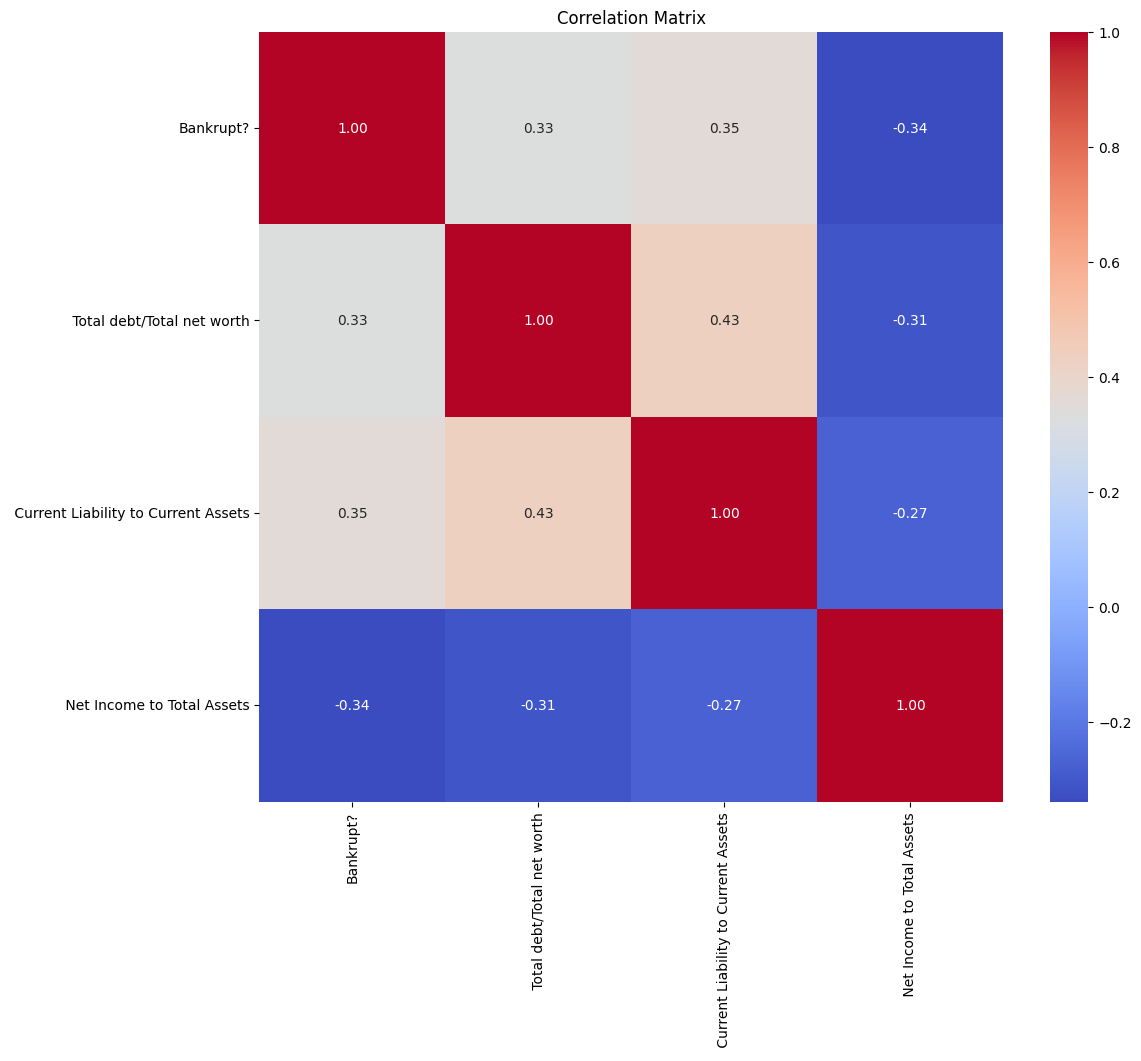

In [14]:
correlation_matrix = dfq_filtered.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [16]:
dfq_filtered

,Bankrupt?,Total debt/Total net worth,Current Liability to Current Assets,Net Income to Total Assets
239,0,0.001595,0.017526,0.765336
2850,0,0.007164,0.029840,0.817797
2687,0,0.003319,0.021286,0.847518
6500,1,0.029799,0.042961,0.767650
2684,0,0.014674,0.049027,0.810394
...,...,...,...,...
712,0,0.005161,0.034919,0.712651
1729,0,0.008950,0.038220,0.800733
472,0,0.001204,0.007974,0.821170
3734,0,0.001776,0.009069,0.884578


In [17]:
dfq_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 239 to 4471
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Bankrupt?                             500 non-null    int64  
 1    Total debt/Total net worth           500 non-null    float64
 2    Current Liability to Current Assets  500 non-null    float64
 3    Net Income to Total Assets           500 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 19.5 KB


In [18]:
new_dfq=dfq_filtered

In [19]:
X=new_dfq.drop('Bankrupt?',axis=1)
y=new_dfq['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

In [20]:
training_features = X_train.values
training_labels = y_train.values
test_features = X_test.values
test_labels = y_test.values

In [21]:
print(f"Length of training features: {len(training_features)}")
print(f"Length of training labels: {len(training_labels)}")
print(f"Length of test features: {len(test_features)}")
print(f"Length of test labels: {len(test_labels)}")

Length of training features: 375
Length of training labels: 375
Length of test features: 125
Length of test labels: 125


# Feature Map and Ansatz For Quantum ML


### Quantum Machine Learning Essentials
In classical machine learning, two key components are:
* Features: Representing data in a meaningful way.
* Model: Learning patterns from data.
In quantum machine learning, we have analogous components:
* Feature Map: Encoding classical data into quantum states.
* Ansatz: Optimization circuit to update parameters.
### Feature Map: 
1. Transforms classical data into quantum states.
2. Enables quantum processing of classical information.
### Ansatz: 
1. Updates parameters to minimize loss function.
2. Learns patterns from quantum-encoded data.


In [22]:
feature_dim = training_features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")
ansatz = TwoLocal(feature_map.num_qubits, ["ry", "rz"], "cz", reps=3)

## Number of Qubits:
Our modified dataset consists of 3 features, which are encoded onto 3 qubits in our feature map

# Feature Map Display

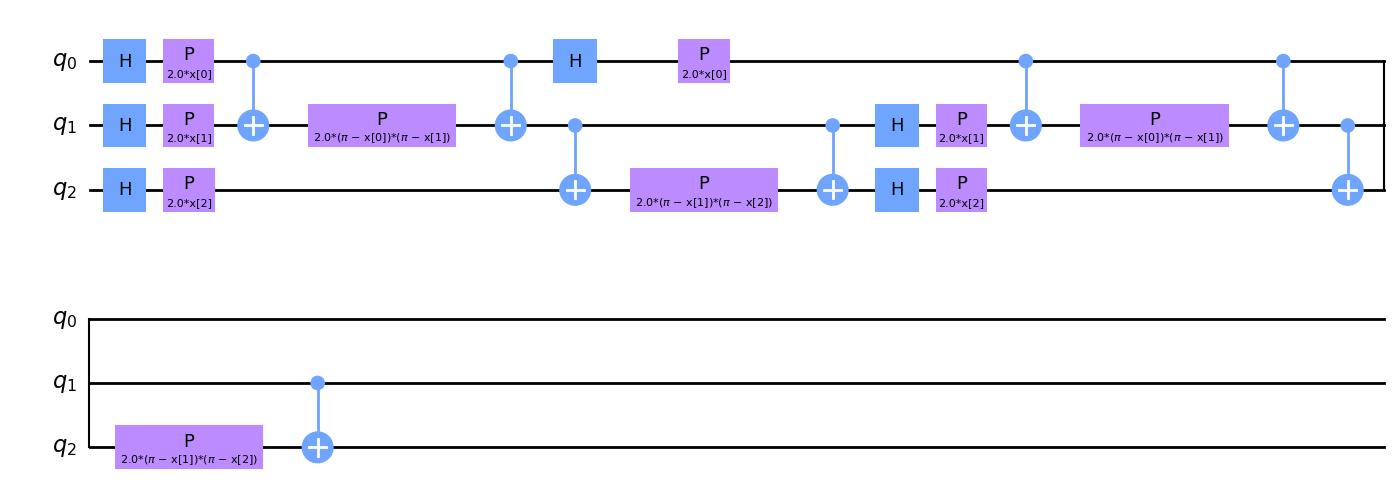

In [23]:
feature_map.decompose().draw(output="mpl", style="clifford", fold=20)

# Ansatz Display

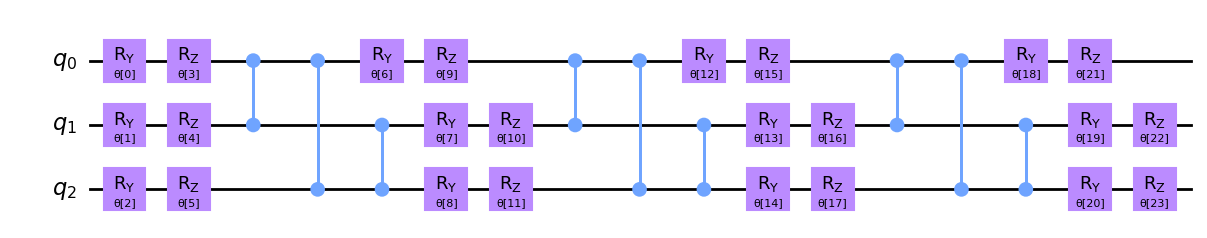

In [24]:
ansatz.decompose().draw(output="mpl", style="clifford", fold=20)


# Model No 1:
## VQC (Variational Quantum Classifier)
VQC is a quantum machine learning algorithm that combines classical and quantum computing to classify data.
### Components:
#### Feature Map: 
Encodes classical data into quantum states.
#### Ansatz: 
Parameterized quantum circuit to update parameters.
#### Optimizer: 
Classical optimization algorithm to minimize loss.
### Workflow:
#### Initialization:
* Define feature map, ansatz, and optimizer.
* Initialize VQC model.
#### Training:
* Fit VQC model to training data (vqc.fit()).
* Optimizer updates parameters to minimize loss.
#### Testing:
* Evaluate VQC model on test data (vqc.score()).
* Calculate accuracy.

In [25]:
optimizer = COBYLA(maxiter=50)
sampler = Sampler()
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()


C:\Users\SURFACE\AppData\Local\Temp\ipykernel_5236\1565725662.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


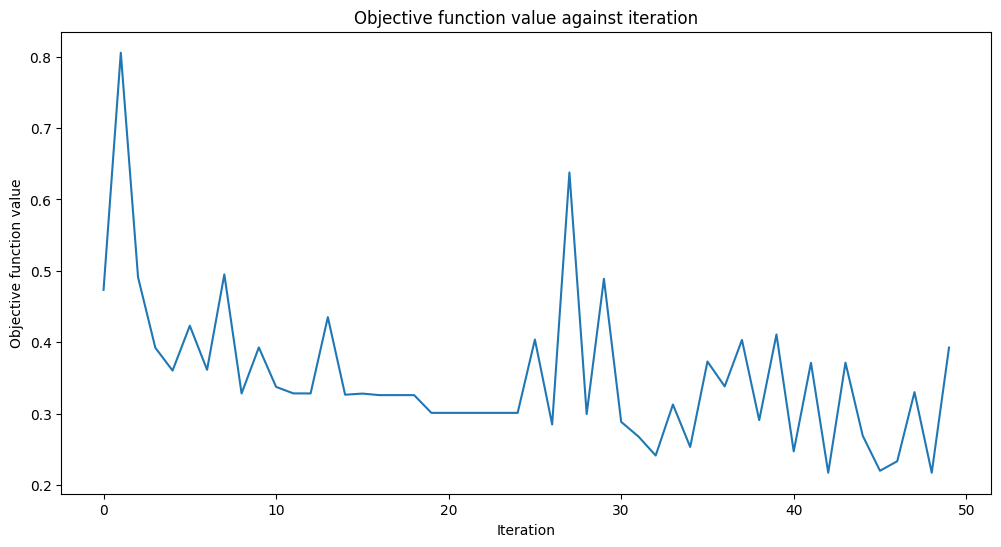

Training time: 212 seconds
Testing accuracy: 0.98


In [26]:
import time
vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(training_features, training_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")
score = vqc.score(test_features, test_labels)
print(f"Testing accuracy: {score:0.2f}")

In [27]:
training_predictions = vqc.predict(training_features)
training_accuracy = accuracy_score(training_labels, training_predictions)
training_f1 = f1_score(training_labels, training_predictions)
training_recall = recall_score(training_labels, training_predictions)


print(f"Training accuracy: {training_accuracy:0.2f}")



Training accuracy: 0.95


# VQC Results (Simulation)
## Overview
The results indicate the performance of the Variational Quantum Classifier (VQC) on both training and testing datasets.
## Metrics
* Accuracy: Proportion of correctly classified samples.
* F1 Score: Harmonic mean of precision and recall.
* Recall: Proportion of true positives among all actual positive samples.
## Results Analysis
### Training Metrics
* Training Accuracy: 0.98 (98%)
* The model correctly classified 98% of the training samples.

* Testing Metric
# Testing Accuracy: 0.94 (94%)
* The model maintained its performance on unseen data.

In [28]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.visualization import circuit_drawer
from qiskit.circuit.library import ZZFeatureMap
from qiskit_algorithms.optimizers import SPSA
from qiskit_machine_learning.kernels import TrainableFidelityQuantumKernel
from qiskit_machine_learning.kernels.algorithms import QuantumKernelTrainer
from qiskit_machine_learning.algorithms import QSVC

In [29]:
class QKTCallback:
    """Callback wrapper class."""

    def __init__(self) -> None:
        self._data = [[] for i in range(5)]

    def callback(self, x0, x1=None, x2=None, x3=None, x4=None):
        """
        Args:
            x0: number of function evaluations
            x1: the parameters
            x2: the function value
            x3: the stepsize
            x4: whether the step was accepted
        """
        self._data[0].append(x0)
        self._data[1].append(x1)
        self._data[2].append(x2)
        self._data[3].append(x3)
        self._data[4].append(x4)

    def get_callback_data(self):
        return self._data

    def clear_callback_data(self):
        self._data = [[] for i in range(5)]

In [30]:
# Create a rotational layer to train. We will rotate each qubit the same amount.
training_params = ParameterVector("θ", 1)
fm0 = QuantumCircuit(3)
fm0.ry(training_params[0], 0)
fm0.ry(training_params[0], 1)
fm0.ry(training_params[0], 2)

# Use ZZFeatureMap to represent input data
fm1 = ZZFeatureMap(3)

# Create the feature map, composed of our two circuits
fm = fm0.compose(fm1)

print(circuit_drawer(fm))
print(f"Trainable parameters: {training_params}")

     ┌──────────┐┌───────────────────────────────┐
q_0: ┤ Ry(θ[0]) ├┤0                              ├
     ├──────────┤│                               │
q_1: ┤ Ry(θ[0]) ├┤1 ZZFeatureMap(x[0],x[1],x[2]) ├
     ├──────────┤│                               │
q_2: ┤ Ry(θ[0]) ├┤2                              ├
     └──────────┘└───────────────────────────────┘
Trainable parameters: θ, ['θ[0]']


In [31]:
# Instantiate quantum kernel
quant_kernel = TrainableFidelityQuantumKernel(feature_map=fm, training_parameters=training_params)

# Set up the optimizer
cb_qkt = QKTCallback()
spsa_opt = SPSA(maxiter=10, callback=cb_qkt.callback, learning_rate=0.05, perturbation=0.05)

# Instantiate a quantum kernel trainer.
qkt = QuantumKernelTrainer(
    quantum_kernel=quant_kernel, loss="svc_loss", optimizer=spsa_opt, initial_point=[np.pi / 2]
)

In [33]:
# Train the kernel using QKT directly
qka_results = qkt.fit(X_train, y_train)
optimized_kernel = qka_results.quantum_kernel
print(qka_results)

{   'optimal_circuit': None,
    'optimal_parameters': {   ParameterVectorElement(θ[0]): np.float64(1.5364074509838854)},
    'optimal_point': array([1.53640745]),
    'optimal_value': np.float64(37.61025772589496),
    'optimizer_evals': 30,
    'optimizer_result': None,
    'optimizer_time': None,
    'quantum_kernel': <qiskit_machine_learning.kernels.trainable_fidelity_quantum_kernel.TrainableFidelityQuantumKernel object at 0x0000012D56950E30>}


In [34]:
from sklearn import metrics
# Use QSVC for classification
qsvc = QSVC(quantum_kernel=optimized_kernel)

# Fit the QSVC
qsvc.fit(X_train, y_train)

# Predict the labels
labels_test = qsvc.predict(X_test)

# Evalaute the test accuracy
accuracy_test = metrics.balanced_accuracy_score(y_true=y_test, y_pred=labels_test)
print(f"accuracy test: {accuracy_test}")

accuracy test: 0.5


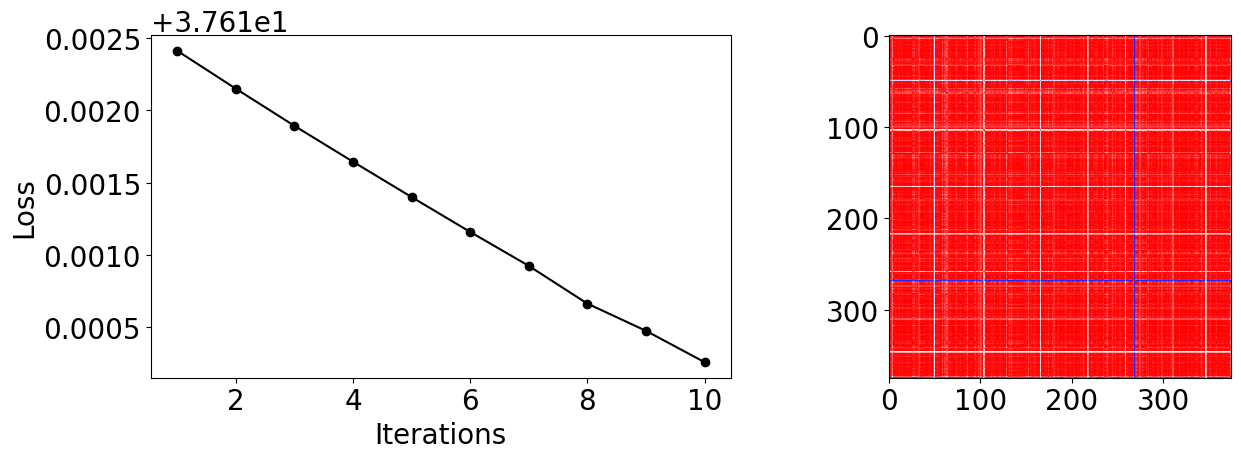

In [35]:
import matplotlib
plot_data = cb_qkt.get_callback_data()  # callback data
K = optimized_kernel.evaluate(X_train)  # kernel matrix evaluated on the training samples

plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].plot([i + 1 for i in range(len(plot_data[0]))], np.array(plot_data[2]), c="k", marker="o")
ax[0].set_xlabel("Iterations")
ax[0].set_ylabel("Loss")
ax[1].imshow(K, cmap=matplotlib.colormaps["bwr"])
fig.tight_layout()
plt.show()

# Model No 2:

# Fidelity Kernel Based QSVC

## Quantum Kernel Algorithm Components
### 1. Sampler
Purpose: Generates samples from a quantum circuit.
Initialization: sampler = Sampler()
### 2. Fidelity
Definition: Measures the similarity between two quantum states.
ComputeUncompute: Calculates fidelity by comparing the original and uncomputed states.
Initialization: fidelity = ComputeUncompute(sampler=sampler)
### 3. Quantum Kernel
Definition: A quantum version of a classical kernel, enabling quantum machine learning.
FidelityQuantumKernel: Utilizes fidelity to construct a quantum kernel.
Initialization: q_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

In [37]:
sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

q_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_5236\2568583920.py:1: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


# Implementation
I are going to implement a Quantum Support Vector Classification (QSVC) model, utilizing a previously constructed quantum kernel. It initializes the QSVC model, trains it on labeled training data, and evaluates its performance on test data. The model's test accuracy is then printed, providing insight into its classification capabilities. Essentially, this code leverages quantum computing to enhance classification accuracy, robustness, and efficiency, particularly in handling high-dimensional data. 

In [38]:
qsvc = QSVC(
    quantum_kernel=q_kernel
)

start = time.time()
qsvc.fit(training_features, training_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

qsvc_score = qsvc.score(test_features, test_labels)

print(f"QSVC classification test score: {qsvc_score}")

Training time: 354 seconds
QSVC classification test score: 0.976


# Model No. 3: <br> Kernel PCA QSVC

In [39]:
matrix_train = q_kernel.evaluate(x_vec=training_features)
matrix_test = q_kernel.evaluate(x_vec=test_features, y_vec=training_features)

In [40]:
from sklearn.decomposition import KernelPCA

kernel_pca_q = KernelPCA(n_components=2, kernel="precomputed")
train_features_q = kernel_pca_q.fit_transform(matrix_train)
test_features_q = kernel_pca_q.transform(matrix_test)

In [41]:
# Train QSCV model on New Features
qsvc.fit(train_features_q, training_labels)

# Evaluate model
accuracy = qsvc.score(test_features_q, test_labels)
print("QSVC Accuracy:", accuracy)

QSVC Accuracy: 0.976


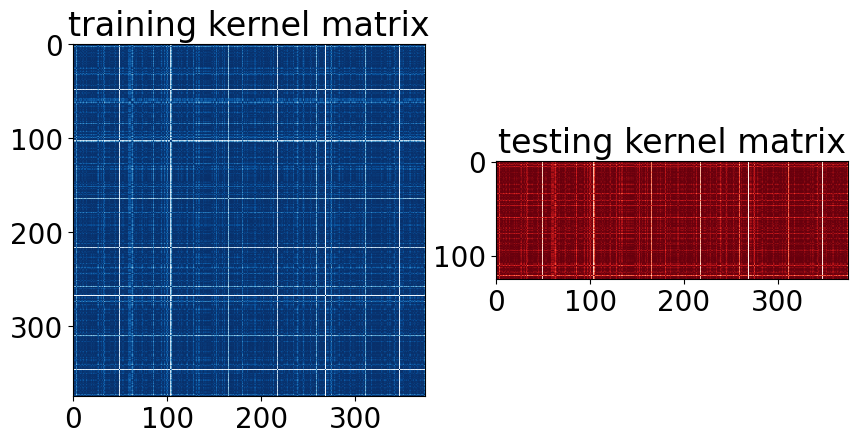

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("training kernel matrix")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("testing kernel matrix")

plt.show()

# Running on IBM Runtime

In [28]:
# from qiskit_ibm_runtime import QiskitRuntimeService

# service = QiskitRuntimeService(channel='ibm_quantum', token='f73393d0b4e099ab95417406a2c31844acdfaaf9373a2e0a3366ea247a6fb275652ea4d3fcb4ba2de1318577d3bced2d09aeb9610f761eaddb0a983d6b033661')
# backend=service.least_busy()

# Running VQC Algorithm

In [30]:
# from qiskit_ibm_runtime import Session
# from qiskit_ibm_runtime import SamplerV2 as SamplerQ
# with Session(backend=backend) as session:
#     sampler = SamplerQ(session=session)
#     vqc = VQC(
#     sampler=sampler,
#     feature_map=feature_map,
#     ansatz=ansatz,
#     optimizer=optimizer
# )

# start = time.time()
# vqc.fit(training_features, training_labels)
# elapsed = time.time() - start

# print(f"Training time: {round(elapsed)} seconds")
# score = vqc.score(test_features, test_labels)
# print(f"Testing accuracy: {score:0.2f}")

TypeError: SamplerV2.__init__() got an unexpected keyword argument 'session'

# Running QSVC IBM Implementation

In [32]:
# sampler=SamplerQ(backend=backend)
# fidelity = ComputeUncompute(sampler=sampler)

# q_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map)

TypeError: SamplerV2.__init__() got an unexpected keyword argument 'backend'

In [33]:
# qsvc = QSVC(
#     quantum_kernel=q_kernel
# )

# start = time.time()
# qsvc.fit(training_features, training_labels)
# elapsed = time.time() - start

# print(f"Training time: {round(elapsed)} seconds")

# qsvc_score = qsvc.score(test_features, test_labels)

# print(f"QSVC classification test score: {qsvc_score}")

KeyboardInterrupt: 